In [1]:
import nibabel as nib
from mayavi import mlab
import numpy as np

# Loads image file
nifti_img = nib.load(r'z:\E-Kelly-VidaSegmentals&Sublobes\2- 2AdditionalScans\Kelly Done\SPIROMICS-51287502\A1-Recentered\FlippedAndRecenteredAirwClr.nii.gz')

# Turns image data into numpy array
airway_image_data = nifti_img.get_fdata()

# Identify which segmentations should be which color
red_index = [1, 2, 3, 8, 9, 12, 13, 33, 40, 48, 53, 55, 73, 185]

orange_index = [64, 65, 76, 77, 90, 91, 104, 105, 246, 247]

# Makes locations of previous segmentations 1 and all else 0
red_segments = np.isin(airway_image_data, red_index).astype(int)

orange_segments = np.isin(airway_image_data, orange_index).astype(int)

# Makes array that includes all possible segments
all_segments_index = np.arange(1, 308)

# Makes array of all segments not included in the orange or red indicies
background_index = np.setdiff1d(all_segments_index, np.union1d(red_index, orange_index))

# Makes locations of background segments 1 and all else 0
background_segments = np.isin(airway_image_data, background_index).astype(int)

# Create a figure with white background
fig = mlab.figure(bgcolor=(1, 1, 1)) 

# Create a contour plot of the mask at the 0.5 level for each color
red_mask = mlab.contour3d(red_segments, contours=[0.5], opacity=1, color=(1, 0, 0))

orange_mask = mlab.contour3d(orange_segments, contours=[0.5], opacity=1, color=(1, 0.5, 0))

background_mask = mlab.contour3d(background_segments, contours=[0.5], color=(1, 0.75, 0), opacity=0.25)

# Displays figure in new window
mlab.show()

In [8]:
# Code for screenshot of highlighted airway tree

import SimpleITK as sitk

# Find Segmentation Center
model = sitk.ReadImage(r'z:\E-Kelly-VidaSegmentals&Sublobes\2- 2AdditionalScans\Kelly Done\SPIROMICS-51287502\A1-Recentered\FlippedAndRecenteredAirwClr.nii.gz')
origin = model.GetOrigin()
dimensions = model.GetSize()
direction = model.GetDirection()
spacing = (0.38, 0.38, 0.38)
distance = np.array(spacing) * np.array(dimensions)
center = np.array(origin) + np.array(distance) / 2

mlab.figure(bgcolor=(1, 1, 1))

# This 600 is 60 cm away from the coronal plane from behind
x, y, z = center[0], center[1], center[2]
ypt = y + 600
camera_focal_point = np.array([x, y, z])
camera_position = np.array([x,ypt,z])

# Set the camera parameters
# Write code to calculate this
mlab.gcf().scene.camera.position = [x, ypt, z]
mlab.gcf().scene.camera.focal_point = [x, y, z]
mlab.gcf().scene.camera.view_up = [0, 0, 1]

mlab.gcf().scene.camera.view_angle = 23 # Adjust the FOV angle
mlab.gcf().scene.camera.clipping_range = (1, 10000)  # Adjust near and far clipping planes

red_mask = mlab.contour3d(red_segments, contours=[0.5], opacity=1, color=(1, 0, 0))

orange_mask = mlab.contour3d(orange_segments, contours=[0.5], opacity=1, color=(1, 0.5, 0))

background_mask = mlab.contour3d(background_segments, contours=[0.5], color=(1, 0.75, 0), opacity=0.25)

screenshot_filename = r"c:\Users\akuhn1\Documents\TestFigures\airway_screenshot.png"

mlab.savefig(screenshot_filename, size=(800, 800))

mlab.show()


In [2]:
# Loads lung image file
nifti_img2 = nib.load(r'Z:\E-Kelly-VidaSegmentals&Sublobes\2- 2AdditionalScans\Kelly Done\SPIROMICS-51287502\A1-Recentered\ZUNU_vida-lung-recentered.nii.gz')

# Turns lung image data into numpy array
lung_image_data = nifti_img2.get_fdata()

# Create a figure with white background
fig = mlab.figure(bgcolor=(1, 1, 1)) 

# Create a contour plot of the mask at the 0.5 level for entire airway tree
airway_mask = mlab.contour3d(airway_image_data, contours=[0.5], color=(1, 0.75, 0), opacity=1)

lung_mask = mlab.contour3d(lung_image_data, contours=[0.5], color=(0.3, 0.3, 0.2), opacity=0.05)

# Displays figure in new window
mlab.show()

In [8]:
# Code for screenshot of airway tree and lung mask

import SimpleITK as sitk

# Find Segmentation Center
model = sitk.ReadImage(r'Z:\E-Kelly-VidaSegmentals&Sublobes\2- 2AdditionalScans\Kelly Done\SPIROMICS-51287502\A1-Recentered\ZUNU_vida-lung-recentered.nii.gz')
origin = model.GetOrigin()
dimensions = model.GetSize()
direction = model.GetDirection()
spacing = (0.38, 0.38, 0.38)
distance = np.array(spacing) * np.array(dimensions)
center = np.array(origin) + np.array(distance) / 2

mlab.figure(bgcolor=(1, 1, 1))

# This 600 is 60 cm away from the coronal plane from behind
x, y, z = center[0], center[1], center[2]
ypt = y + 600
camera_focal_point = np.array([x, y, z])
camera_position = np.array([x,ypt,z])

# Set the camera parameters
# Write code to calculate this
mlab.gcf().scene.camera.position = [x, ypt, z]
mlab.gcf().scene.camera.focal_point = [x, y, z]
mlab.gcf().scene.camera.view_up = [0, 0, 1]

mlab.gcf().scene.camera.view_angle = 23 # Adjust the FOV angle
mlab.gcf().scene.camera.clipping_range = (1, 10000)  # Adjust near and far clipping planes

airway_mask = mlab.contour3d(airway_image_data, contours=[0.5], color=(1, 0.75, 0), opacity=1)

lung_mask = mlab.contour3d(lung_image_data, contours=[0.5], color=(0.5, 0.5, 0.5), opacity=0.1)

screenshot_filename = r"c:\Users\akuhn1\Documents\TestFigures\lungandairway_screenshot.png"

mlab.savefig(screenshot_filename, size=(800, 800))

mlab.show()


In [ ]:
# IN PROGRESS TO CONVERT CONTOURS TO VTK

import SimpleITK as sitk
import vtkmodules.all as vtk
import numpy as np

# Find Segmentation Center for the first image
model1 = sitk.ReadImage(r'Z:\E-Kelly-VidaSegmentals&Sublobes\2- 2AdditionalScans\Kelly Done\SPIROMICS-51287502\A1-Recentered\ZUNU_vida-lung-recentered.nii.gz')
decimation_factors = [1, 1, 1]  # Adjust factors for downsampling
model1 = sitk.Shrink(model1, decimation_factors)
origin = model1.GetOrigin()
dimensions = model1.GetSize()
spacing = model1.GetSpacing()
distance = np.array(spacing) * np.array(dimensions)
center = np.array(origin) + np.array(distance) / 2

# Create a VTKImageData from SimpleITK data for the first image
vtk_image_data = vtk.vtkImageData()
vtk_image_data.SetOrigin(origin)
vtk_image_data.SetDimensions(dimensions)
vtk_image_data.SetSpacing(spacing)
vtk_image_data.AllocateScalars(vtk.VTK_UNSIGNED_CHAR, 1)

# Copy the pixel data from SimpleITK to VTK for the first image
for z in range(dimensions[2]):
    for y in range(dimensions[1]):
        for x in range(dimensions[0]):
            try:
                vtk_image_data.SetScalarComponentFromDouble(x, y, z, 0, model1.GetPixel([x, y, z]))
            except Exception as e:
                print(f"Error setting scalar component at (x={x}, y={y}, z={z}): {e}")

# Read the second image
model2 = sitk.ReadImage(r'z:\E-Kelly-VidaSegmentals&Sublobes\2- 2AdditionalScans\Kelly Done\SPIROMICS-51287502\A1-Recentered\FlippedAndRecenteredAirwClr.nii.gz')
decimation_factors = [1, 1, 1]  # Adjust factors for downsampling
model1 = sitk.Shrink(model2, decimation_factors)

# Combine the pixel data of the two images (e.g., add them together)
combined_pixel_data = sitk.GetArrayFromImage(model1) + sitk.GetArrayFromImage(model2)

# Create a new SimpleITK image from the combined pixel data
combined_model = sitk.GetImageFromArray(combined_pixel_data)

# Create a VTK Image Data object from the combined image
vtk_image_data_combined = vtk.vtkImageData()
vtk_image_data_combined.SetOrigin(model1.GetOrigin())
vtk_image_data_combined.SetDimensions(model1.GetSize())
vtk_image_data_combined.SetSpacing(model1.GetSpacing())
vtk_image_data_combined.AllocateScalars(vtk.VTK_UNSIGNED_CHAR, 1)

# Copy the pixel data from SimpleITK to VTK
for z in range(model1.GetDepth()):
    for y in range(model1.GetHeight()):
        for x in range(model1.GetWidth()):
            vtk_image_data_combined.SetScalarComponentFromDouble(x, y, z, 0, combined_model.GetPixel([x, y, z]))

# Create a VTK Marching Cubes filter for the contour
contour_filter = vtk.vtkMarchingCubes()
contour_filter.SetInputData(vtk_image_data_combined)
contour_filter.SetValue(0, 0.5)

# Use vtkDecimatePro for simplification
decimate = vtk.vtkDecimatePro()
decimate.SetInputConnection(contour_filter.GetOutputPort())
decimate.SetTargetReduction(0.999)  # Adjust the reduction factor as needed

# Create a VTK PolyDataMapper and Actor for the decimated contour
contour_mapper = vtk.vtkPolyDataMapper()
contour_mapper.SetInputConnection(decimate.GetOutputPort())

contour_actor = vtk.vtkActor()
contour_actor.SetMapper(contour_mapper)
contour_actor.GetProperty().SetColor(0, 0, 1)  # Set color to blue
contour_actor.GetProperty().SetOpacity(0.5)   # Set opacity for transparency

# Create a VTK Renderer and RenderWindow
renderer = vtk.vtkRenderer()
render_window = vtk.vtkRenderWindow()
render_window.SetWindowName("3D VTK Model")

# Set background color to white
renderer.SetBackground(1, 1, 1)

# Add the contour actor to the renderer
renderer.AddActor(contour_actor)

# Set camera parameters (adjust these as needed)
renderer.GetActiveCamera().SetPosition(center[0], center[1] + 600, center[2])
renderer.GetActiveCamera().SetFocalPoint(center[0], center[1], center[2])
renderer.GetActiveCamera().SetViewUp(0, 0, 1)
renderer.GetActiveCamera().SetViewAngle(23)
renderer.GetActiveCamera().SetClippingRange(1, 10000)

# Create a VTK RenderWindowInteractor
render_window_interactor = vtk.vtkRenderWindowInteractor()
render_window_interactor.SetRenderWindow(render_window)

# Set the renderer for the render window and start the interaction
render_window.AddRenderer(renderer)
render_window.Render()
render_window_interactor.Start()






In [ ]:
#Creates 19 Highlighted Locations

import nibabel as nib
from mayavi import mlab
import numpy as np

# Loads image file
nifti_img = nib.load(r'z:\E-Kelly-VidaSegmentals&Sublobes\2- 2AdditionalScans\Kelly Done\SPIROMICS-51287502\A1-Recentered\FlippedAndRecenteredAirwClr.nii.gz')

# Turns image data into numpy array
airway_image_data = nifti_img.get_fdata()

# Identify which segmentations should be which color
red_index = [1, 2, 3, 8, 9, 12, 13, 33, 40, 48, 53, 55, 73, 185]

orange_index = [64, 65, 76, 77, 90, 91, 104, 105, 246, 247]

# Makes locations of previous segmentations 1 and all else 0
red_segments = np.isin(airway_image_data, red_index).astype(int)

orange_segments = np.isin(airway_image_data, orange_index).astype(int)

# Makes array that includes all possible segments
all_segments_index = np.arange(1, 308)

# Makes array of all segments not included in the orange or red indicies
background_index = np.setdiff1d(all_segments_index, np.union1d(red_index, orange_index))

# Makes locations of background segments 1 and all else 0
background_segments = np.isin(airway_image_data, background_index).astype(int)

# Create a figure with white background
fig = mlab.figure(bgcolor=(1, 1, 1)) 

# Create a contour plot of the mask at the 0.5 level for each color
red_mask = mlab.contour3d(red_segments, contours=[0.5], opacity=1, color=(1, 0, 0))

orange_mask = mlab.contour3d(orange_segments, contours=[0.5], opacity=1, color=(1, 0.5, 0))

background_mask = mlab.contour3d(background_segments, contours=[0.5], color=(1, 0.75, 0), opacity=0.25)

# Displays figure in new window
mlab.show()








# Code for screenshot of highlighted airway tree

import SimpleITK as sitk
import nibabel as nib
from mayavi import mlab
import numpy as np

airway_file = r'z:\E-Kelly-VidaSegmentals&Sublobes\2- 2AdditionalScans\Kelly Done\SPIROMICS-51287502\A1-Recentered\FlippedAndRecenteredAirwClr.nii.gz'

# Loads image file
airway_img = nib.load(airway_file)

# Turns image data into numpy array
airway_image_data = airway_img.get_fdata()

# Identify which segmentations should be which color
red_index = [1, 2, 3, 8, 9, 12, 13, 33, 40, 48, 53, 55, 73, 185]

orange_index = [64, 65, 76, 77, 90, 91, 104, 105, 246, 247]

# Makes locations of previous segmentations 1 and all else 0
red_segments = np.isin(airway_image_data, red_index).astype(int)

orange_segments = np.isin(airway_image_data, orange_index).astype(int)

# Makes array that includes all possible segments
all_segments_index = np.arange(1, 308)

# Makes array of all segments not included in the orange or red indicies
background_index = np.setdiff1d(all_segments_index, np.union1d(red_index, orange_index))

# Makes locations of background segments 1 and all else 0
background_segments = np.isin(airway_image_data, background_index).astype(int)

# Find Segmentation Center
model = sitk.ReadImage(airway_file)
origin = model.GetOrigin()
dimensions = model.GetSize()
direction = model.GetDirection()
spacing = (0.38, 0.38, 0.38)
distance = np.array(spacing) * np.array(dimensions)
center = np.array(origin) + np.array(distance) / 2

mlab.figure(bgcolor=(1, 1, 1))

# This 600 is 60 cm away from the coronal plane from behind
x, y, z = center[0], center[1], center[2]
ypt = y + 600
camera_focal_point = np.array([x, y, z])
camera_position = np.array([x,ypt,z])


# Set the camera parameters
# Write code to calculate this
mlab.gcf().scene.camera.position = [x, ypt, z]
mlab.gcf().scene.camera.focal_point = [x, y, z]
mlab.gcf().scene.camera.view_up = [0, 0, 1]

mlab.gcf().scene.camera.view_angle = 23 # Adjust the FOV angle
mlab.gcf().scene.camera.clipping_range = (1, 10000)  # Adjust near and far clipping planes

red_mask = mlab.contour3d(red_segments, contours=[0.5], opacity=1, color=(1, 0, 0))

orange_mask = mlab.contour3d(orange_segments, contours=[0.5], opacity=1, color=(1, 0.5, 0))

background_mask = mlab.contour3d(background_segments, contours=[0.5], color=(1, 0.75, 0), opacity=0.25)

screenshot_filename = r"Z:\Q- Figures\T32-Poster\Allyson\Experiment\Case 24\colored_airway_screenshot.png"

mlab.savefig(screenshot_filename, size=(800, 800))

# Loads lung image file
nifti_img2 = nib.load(r'Z:\E-Kelly-VidaSegmentals&Sublobes\2- 2AdditionalScans\Kelly Done\SPIROMICS-51287502\A1-Recentered\ZUNU_vida-lung-recentered.nii.gz')

# Turns lung image data into numpy array
lung_image_data = nifti_img2.get_fdata()

# Create a figure with white background
fig = mlab.figure(bgcolor=(1, 1, 1)) 

# Create a contour plot of the mask at the 0.5 level for entire airway tree
airway_mask = mlab.contour3d(airway_image_data, contours=[0.5], color=(1, 0.75, 0), opacity=1)

lung_mask = mlab.contour3d(lung_image_data, contours=[0.5], color=(0.3, 0.3, 0.2), opacity=0.05)

# Displays figure in new window
mlab.show()














# Code for screenshot of airway tree and lung mask

import SimpleITK as sitk
import nibabel as nib
from mayavi import mlab
import numpy as np

airway_file = r'z:\E-Kelly-VidaSegmentals&Sublobes\2- 2AdditionalScans\Kelly Done\SPIROMICS-51287502\A1-Recentered\ZUNU_vida-airtree-recentered.nii.gz'
lung_file = r'Z:\E-Kelly-VidaSegmentals&Sublobes\2- 2AdditionalScans\Kelly Done\SPIROMICS-51287502\A1-Recentered\ZUNU_vida-lung-recentered.nii.gz'

# Loads image file
airway_img = nib.load(airway_file)
lung_img = nib.load(lung_file)

# Turns image data into numpy array
airway_image_data = airway_img.get_fdata()
lung_image_data = lung_img.get_fdata()

# Find Segmentation Center
model = sitk.ReadImage(lung_file)
origin = model.GetOrigin()
dimensions = model.GetSize()
direction = model.GetDirection()
spacing = (0.38, 0.38, 0.38)
distance = np.array(spacing) * np.array(dimensions)
center = np.array(origin) + np.array(distance) / 2

mlab.figure(bgcolor=(1, 1, 1))

# This 600 is 60 cm away from the coronal plane from behind
x, y, z = center[0], center[1], center[2]
ypt = y + 600
camera_focal_point = np.array([x, y, z])
camera_position = np.array([x,ypt,z])

# Set the camera parameters
# Write code to calculate this
mlab.gcf().scene.camera.position = [x, ypt, z]
mlab.gcf().scene.camera.focal_point = [x, y, z]
mlab.gcf().scene.camera.view_up = [0, 0, 1]

mlab.gcf().scene.camera.view_angle = 23 # Adjust the FOV angle
mlab.gcf().scene.camera.clipping_range = (1, 10000)  # Adjust near and far clipping planes

airway_mask = mlab.contour3d(airway_image_data, contours=[0.5], color=(230/255, 220/255, 70/255), opacity=1)

lung_mask = mlab.contour3d(lung_image_data, contours=[0.5], color=(128/255, 174/255, 128/255), opacity=0.15)

screenshot_filename = r"Z:\Q- Figures\T32-Poster\Allyson\Experiment\Case 24\lungandairway_screenshot.png"

mlab.savefig(screenshot_filename, size=(800, 800))














#Image Creation Code

import os
import SimpleITK as sitk
import numpy as np
import nibabel as nib
from mayavi import mlab
import vtk

# Function finds correct files
def find_airway_file(folder_path):
    airway_file = None
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith("airtree-recentered_output.vtk"):
                airway_file = os.path.join(root, file)
        
        if airway_file:
            break  # All files are found, exit the loop
    
    return airway_file

def find_atree_lung_files(folder_path):
    atree_file = None
    lung_file = None
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith("Aseed.vtk"):
                atree_file = os.path.join(root, file)
            elif file.endswith("Lungs.vtk"):
                lung_file = os.path.join(root, file)
        
        
        if atree_file and lung_file:
            break  # All files are found, exit the loop
    
    return atree_file, lung_file



# Define the output directory where you want to save the new files
output_directory = r"Z:\Q- Figures\T32-Poster\Allyson\Experiment\Case 24"

# Find correct files in base folder
atree_lung_base_folder = r"Z:\Q- Figures\T32-Poster\Nate\Experiment\Case-24"

airway_base_folder = r"Z:\Q- Figures\T32-Poster\Allyson\Experiment\Case 24"

atree_file, lung_file = find_atree_lung_files(atree_lung_base_folder)

airway_file = find_airway_file(airway_base_folder)

if airway_file and lung_file and atree_file:
    print("All files were found for", base_folder)
    print("Airway File:", airway_file)
    print("Lung File:", lung_file)
    print("ATree File:", atree_file)



















#Image Creation Code

mlab.figure(bgcolor=(1, 1, 1))

# Load the VTK files using Mayavi's open function
srcAW = mlab.pipeline.open(airway_file)
srcL = mlab.pipeline.open(lung_file)
srcAT = mlab.pipeline.open(atree_file)

# Create a surface visualization of the data with colors and opacity
surfaceAW = mlab.pipeline.surface(srcAW, color=(1, 0, 0), opacity=1)
surfaceL = mlab.pipeline.surface(srcL, color=(0, 1, 0), opacity=0.09)
surfaceAT = mlab.pipeline.surface(srcAT, color=(0, 0, 1), opacity=0.5)

# Create a VTK reader to calculate the center
reader = vtk.vtkDataSetReader()
reader.SetFileName(airway_file)
reader.Update()

# Get the bounds of the loaded VTK dataset
bounds = reader.GetOutput().GetBounds()

# Calculate the center using the bounds
center = [(bounds[0] + bounds[1]) / 2, (bounds[2] + bounds[3]) / 2, (bounds[4] + bounds[5]) / 2]

# Calculate the distance between the camera and the object (adjust as needed)
distance = 2000  # You can adjust this value to change the camera distance

# Calculate the camera position based on the center and distance
camera_position = [center[0], center[1] + distance, center[2]]

# Set the camera parameters
mlab.view(azimuth=90, elevation=90, distance=distance, focalpoint=center)

# Save a screenshot with a magnification factor
magnification_factor = 5
mlab.savefig(os.path.join(output_directory, "screenshot.png"), magnification=magnification_factor)

print("Screenshot saved at:", output_directory)















#Image Creation Code

import numpy as np
from mayavi import mlab
import SimpleITK as sitk

# Define the paths to your VTK files
vtk_file_A = r'C:\Users\akuhn1\Documents\GitHub\RA4-Project\Figures\Test2\ZUNU_vida-airtree-recentered_decimated.vtk'
vtk_file_V = r'C:\Users\akuhn1\Documents\GitHub\RA4-Project\Figures\Test2\ZUNU_vida-lung-recentered_decimated.vtk'

# Load the VTK files using Mayavi's open function
srcA = mlab.pipeline.open(vtk_file_A)
srcL = mlab.pipeline.open(vtk_file_V)

# Create a surface visualization of the data with colors and opacity
surfaceA = mlab.pipeline.surface(srcA, color=(0, 151/255, 206/255), opacity=1)
surfaceV = mlab.pipeline.surface(srcV, color=(216/255, 101/255, 79/255), opacity=0.2)

# Find Segmentation Center
model = sitk.ReadImage(r'Z:\E-Kelly-VidaSegmentals&Sublobes\2- 2AdditionalScans\Kelly Done\SPIROMICS-51287502\A1-Recentered\ZUNU_vida-airtree-recentered.nii.gz')
origin = model.GetOrigin()
dimensions = model.GetSize()
direction = model.GetDirection()
spacing = (0.38, 0.38, 0.38)
distance = np.array(spacing) * np.array(dimensions)
center = np.array(origin) + np.array(distance) / 2

# This 600 is 60 cm away from the coronal plane from behind
x, y, z = center[0], center[1], center[2]
ypt = y + 600

camera_focal_point = np.array([x, y, z])
camera_position = np.array([x, ypt, z])

# Set the camera parameters
mlab.gcf().scene.camera.position = camera_position
mlab.gcf().scene.camera.focal_point = camera_focal_point
mlab.gcf().scene.camera.view_up = [0, 0, 1]

# Set the output file path
output_file_path = r'C:\Users\akuhn1\Documents\GitHub\RA4-Project\Figures\Test2\screenshot.png'

# Save a screenshot with a magnification factor
magnification_factor = 5
mlab.savefig(output_file_path, magnification=magnification_factor)

print("Screenshot saved at:", output_file_path)











#Image Creation Code

from mayavi import mlab
import vtk
import numpy as np

# Define the paths to your VTK files
vtk_file_A = r'C:\Users\akuhn1\Documents\GitHub\RA4-Project\Figures\Test2\ZUNU_vida-airtree-recentered_decimated.vtk'
vtk_file_V = r'C:\Users\akuhn1\Documents\GitHub\RA4-Project\Figures\Test2\ZUNU_vida-lung-recentered_decimated.vtk'

# Load the VTK files using Mayavi's open function
srcA = mlab.pipeline.open(vtk_file_A)
srcV = mlab.pipeline.open(vtk_file_V)

# Create a surface visualization of the data with colors and opacity
surfaceA = mlab.pipeline.surface(srcA, color=(0, 151/255, 206/255), opacity=1)
surfaceV = mlab.pipeline.surface(srcV, color=(216/255, 101/255, 79/255), opacity=0.2)

# Create a VTK reader to calculate the center
reader = vtk.vtkDataSetReader()
reader.SetFileName(vtk_file_A)
reader.Update()

# Get the bounds of the loaded VTK dataset
bounds = reader.GetOutput().GetBounds()

# Calculate the center using the bounds
center = [(bounds[0] + bounds[1]) / 2, (bounds[2] + bounds[3]) / 2, (bounds[4] + bounds[5]) / 2]

# Calculate the distance between the camera and the object (adjust as needed)
distance = 1800  # You can adjust this value to change the camera distance

# Calculate the camera position based on the center and distance
camera_position = [center[0], center[1] + distance, center[2]]

# Set the camera parameters
mlab.view(azimuth=90, elevation=90, distance=distance, focalpoint=center)

# Display the Mayavi visualization window
mlab.show()















#Lung Volume Calculations

import os
import glob
import nibabel as nib
import numpy as np

# average = 0

# List of integers
integers = [29]  # Replace with your list of integers

# Base folder where you want to start the search
base_folder = r'z:\D-Images\SPIROMICS-SubStudy\2-Results-CheckedDoneTemp\1-Done'  # Replace with the actual path to the 'abc' folder

for integer in integers:
    # Construct a prefix to search for, e.g., "Case-1"
    folder_prefix = f'Case-{integer}'
    
    # Iterate through folders in the base folder
    for folder_name in os.listdir(base_folder):
        if folder_name.startswith(folder_prefix) and os.path.isdir(os.path.join(base_folder, folder_name)):
            # Navigate to the 'seg_net' folder inside the matched folder
            seg_net_folder = os.path.join(base_folder, folder_name, 'seg_net')
            
            # Check if the 'seg_net' folder exists
            if os.path.exists(seg_net_folder) and os.path.isdir(seg_net_folder):
                # Use glob to find all .nii.gz files in the 'seg_net' folder
                nii_files = glob.glob(os.path.join(seg_net_folder, '*nii.gz'))
                
                for nii_file_path in nii_files:
                    # Load the NIfTI image
                    img = nib.load(nii_file_path)

                    # Get the image data as a NumPy array
                    data = img.get_fdata()

                    # Calculate the voxel size (spacing)
                    voxel_size = img.header.get_zooms()

                    # Count the number of voxels with a value of 1
                    object_volume = (np.logical_or(data == 5, data == 17)).sum()

                    # Calculate the total volume in your desired units (e.g., mm^3)
                    # Multiply the number of 1-valued voxels by the voxel volume (spacing)
                    volume = object_volume * (voxel_size[0] * voxel_size[1] * voxel_size[2]) / 1e6

                    average += volume

                    # Print the result for each case and image
                    print(f"Found .nii.gz file for {folder_name}: {nii_file_path}")
                    print(f"Case {integer}: {volume} L")
            else:
                print(f"'seg_net' folder not found for {folder_name}")

# Average = average / 18
# print (f"Average = {Average}")


















#Lung Volume Calculations

import os
import glob
import nibabel as nib
import numpy as np
import pandas as pd

# Initialize an empty list to store data
data_list = []

# List of integers
integers = [28, 66, 65, 46, 73, 67, 69, 84, 77, 54, 30, 29, 60, 34, 72, 48, 86, 59, 64, 63]  # Replace with your list of integers

# Base folder where you want to start the search
base_folder = r'z:\D-Images\SPIROMICS-SubStudy\2-Results-CheckedDoneTemp\1-Done'  # Replace with the actual path to the 'abc' folder

for integer in integers:
    # Construct a prefix to search for, e.g., "Case-1"
    folder_prefix = f'Case-{integer}'
    
    # Iterate through folders in the base folder
    for folder_name in os.listdir(base_folder):
        if folder_name.startswith(folder_prefix) and os.path.isdir(os.path.join(base_folder, folder_name)):
            # Navigate to the 'seg_net' folder inside the matched folder
            seg_net_folder = os.path.join(base_folder, folder_name, 'seg_net')
            
            # Check if the 'seg_net' folder exists
            if os.path.exists(seg_net_folder) and os.path.isdir(seg_net_folder):
                # Use glob to find all .nii.gz files in the 'seg_net' folder
                nii_files = glob.glob(os.path.join(seg_net_folder, '*.nii.gz'))
                
                for nii_file_path in nii_files:
                    # Load the NIfTI image
                    img = nib.load(nii_file_path)

                    # Get the image data as a NumPy array
                    image_data = img.get_fdata()

                    # Calculate the voxel size (spacing)
                    voxel_size = img.header.get_zooms()

                    # Count the number of voxels with a value of 1
                    object_volume = (np.logical_or(image_data == 5, image_data == 17)).sum()

                    # Calculate the total volume in your desired units (e.g., mm^3)
                    # Multiply the number of 1-valued voxels by the voxel volume (spacing)
                    volume = object_volume * (voxel_size[0] * voxel_size[1] * voxel_size[2]) / 1e6

                    # Append data to the list
                    data_list.append([integer, volume])

# Create a DataFrame from the list
df = pd.DataFrame(data_list, columns=['Index', 'Volume'])

# Specify the Excel file name
excel_file_name = 'volume_data.xlsx'

# Save the DataFrame to an Excel file
df.to_excel(excel_file_name, index=False)

print(f"Data saved to {excel_file_name}")













#Lung Volume Calculations

import os
import glob
import nibabel as nib
import numpy as np
import pandas as pd

# Initialize an empty list to store data
data_list = []

# List of integers
integers = [1, 2, 3, 4, 6, 7, 9]  # Replace with your list of integers

# Base folder where you want to start the search
base_folder = r'Z:\D-Images\MESAL-3\2-Checked-Done-Temp\Done'  # Replace with the actual path to the 'abc' folder

for integer in integers:
    # Construct a prefix to search for, e.g., "Case-1"
    folder_prefix = f'Case-0{integer}'
    
    # Iterate through folders in the base folder
    for folder_name in os.listdir(base_folder):
        if folder_name.startswith(folder_prefix) and os.path.isdir(os.path.join(base_folder, folder_name)):
            # Navigate to the 'seg_net' folder inside the matched folder
            seg_net_folder = os.path.join(base_folder, folder_name, 'seg_net')
            
            # Check if the 'seg_net' folder exists
            if os.path.exists(seg_net_folder) and os.path.isdir(seg_net_folder):
                # Use glob to find all .nii.gz files in the 'seg_net' folder
                nii_files = glob.glob(os.path.join(seg_net_folder, '*FRC*mask*.nii.gz'))
                
                for nii_file_path in nii_files:
                    # Load the NIfTI image
                    img = nib.load(nii_file_path)

                    # Get the image data as a NumPy array
                    image_data = img.get_fdata()

                    # Calculate the voxel size (spacing)
                    voxel_size = img.header.get_zooms()

                    # Count the number of voxels with a value of 1
                    object_volume = (np.logical_or(image_data == 5, image_data == 17)).sum()

                    # Calculate the total volume in your desired units (e.g., mm^3)
                    # Multiply the number of 1-valued voxels by the voxel volume (spacing)
                    volume = object_volume * (voxel_size[0] * voxel_size[1] * voxel_size[2]) / 1e6

                    # Append data to the list
                    data_list.append([integer, volume])

# Create a DataFrame from the list
df = pd.DataFrame(data_list, columns=['Index', 'Volume'])

# Specify the Excel file name
excel_file_name = 'volume_data.xlsx'

# Save the DataFrame to an Excel file
df.to_excel(excel_file_name, index=False)

print(f"Data saved to {excel_file_name}")

















#VTK Conversions

import os
import SimpleITK as sitk
import numpy as np
import nibabel as nib
from mayavi import mlab
import vtk
import nrrd

# Function finds correct files
def find_original_files(folder_path):
    airway_file = None
    lung_file = None
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith("airtree-recentered.nii.gz"):
                airway_file = os.path.join(root, file)
            elif file.endswith("lung-recentered.nii.gz"):
                lung_file = os.path.join(root, file)
        
        if airway_file and lung_file:
            break  # All files are found, exit the loop
    
    return airway_file, lung_file

def find_nrrd_files(folder_path):
    airway_file = None
    lung_file = None
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith("airtree-recentered.nrrd"):
                airway_file = os.path.join(root, file)
            elif file.endswith("lung-recentered.nrrd"):
                lung_file = os.path.join(root, file)
        
        if airway_file and lung_file:
            break  # All files are found, exit the loop
    
    return airway_file, lung_file


def find_vtk_files(folder_path):
    airway_file = None
    lung_file = None
    atree_file = None
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith("airtree-recentered.vtk"):
                airway_file = os.path.join(root, file)
            elif file.endswith("lung-recentered.vtk"):
                lung_file = os.path.join(root, file)
            elif file.endswith("Atree.vtk"):
                atree_file = os.path.join(root, file)
        
        if airway_file and atree_file and lung_file:
            break  # All files are found, exit the loop
    
    return airway_file, lung_file, atree_file


# Define the output directory where you want to save the new files
output_directory = r"Z:\Q- Figures\T32-Poster\Allyson\Experiment\Case 24"

# Find correct files in base folder
base_folder = r"z:\E-Kelly-VidaSegmentals&Sublobes\2- 2AdditionalScans\Kelly Done\SPIROMICS-51287502\A1-Recentered"


airway_file, lung_file = find_original_files(base_folder)

if airway_file and lung_file:
    print("All files were found for", base_folder)
    print("Airway File:", airway_file)
    print("Lung File:", lung_file)

# Define a list of file paths for your files (airway, lung, artery)
file_paths = [airway_file, lung_file]

# Loop through the file paths
for nii_file in file_paths:

    nifti_image = sitk.ReadImage(nii_file)

    # Define the output NRRD file name
    nrrd_file = os.path.join(output_directory, os.path.basename(nii_file).replace(".nii.gz", ".nrrd"))

    # Write the NRRD image with the same scale as the NIfTI image
    sitk.WriteImage(nifti_image, nrrd_file)


# # Load the original .nrrd file
# AV_file = (r'z:\D-Images\SPIROMICS-SubStudy\2-Results-CheckedDoneTemp\1-Done\Case-24-Spiromics-51287502\Markups\88-Jensen\S-Final-2-label.nrrd')
# image_data, header = nrrd.read(AV_file)

# # Modify the image data (replace all 2s with 0)
# image_data[image_data == 2] = 0

# # Save the modified data as a new .nrrd file
# atree_nrrd_file = os.path.join(output_directory, os.path.basename(AV_file).replace("S-Final-2-label.nrrd", "Atree.nrrd"))
# nrrd.write(atree_nrrd_file, image_data, header)

# print(f"Modified data saved to {atree_nrrd_file}")


airway_nrrd_file, lung_nrrd_file = find_nrrd_files(output_directory)

nrrd_file_path = [airway_nrrd_file, lung_nrrd_file]

for nrrd_file in nrrd_file_path:
    # Load the .nrrd segmentation for Vseed
    nrrd_reader_vseed = vtk.vtkNrrdReader()
    nrrd_reader_vseed.SetFileName(nrrd_file)
    nrrd_reader_vseed.Update()
    vtk_image_data_vseed = vtk.vtkImageData()
    vtk_image_data_vseed.DeepCopy(nrrd_reader_vseed.GetOutput())

    # Define scalar value for "Vseed" segment
    vseed_scalar_value = 2

    # Create a Marching Cubes filter for "Vseed" segment
    contour_vseed = vtk.vtkMarchingCubes()
    contour_vseed.SetInputData(vtk_image_data_vseed)
    contour_vseed.SetValue(0, vseed_scalar_value)
    contour_vseed.Update()

    # Define the output VTK file name
    output_vtk_file = os.path.join(output_directory, os.path.basename(nrrd_file).replace(".nrrd", ".vtk"))

    # Write the "Vseed" mesh to a .vtk file
    vtk_writer_vseed = vtk.vtkPolyDataWriter()
    vtk_writer_vseed.SetFileName(output_vtk_file)
    vtk_writer_vseed.SetInputData(contour_vseed.GetOutput())
    vtk_writer_vseed.Write()

    # # Specify the path for the decimated VTK file
    # output_vtk_file_path = os.path.join(output_directory, os.path.basename(nii_file).replace(".nii.gz", "_decimated.vtk"))

    # # Create a VTK reader for the original dataset
    # reader = vtk.vtkDataSetReader()
    # reader.SetFileName(output_vtk_file)
    # reader.Update()

    # # Create a vtkDecimatePro filter to decimate the dataset
    # decimate = vtk.vtkDecimatePro()
    # decimate.SetInputConnection(reader.GetOutputPort())
    # decimate.SetTargetReduction(0.9)  # 90% reduction

    # # Create a VTK writer for the decimated dataset
    # writer = vtk.vtkDataSetWriter()
    # writer.SetFileName(output_vtk_file_path)
    # writer.SetInputConnection(decimate.GetOutputPort())
    # writer.Write()

    print(f"Process Complete for {nrrd_file}")




















#Vtk Conversions

# Load the original .nrrd file
AV_file = (r'z:\D-Images\SPIROMICS-SubStudy\2-Results-CheckedDoneTemp\1-Done\Case-24-Spiromics-51287502\Markups\88-Jensen\S-Final-2-label.nrrd')
image_data, header = nrrd.read(AV_file)

# Modify the image data (replace all 2s with 0)
image_data[image_data == 2] = 0

# Save the modified data as a new .nrrd file
atree_file = os.path.join(output_directory, os.path.basename(AV_file).replace("S-Final-2-label.nrrd", "Atree.nrrd"))
nrrd.write(atree_file, image_data, header)

print(f"Modified data saved to {atree_file}")

# Load the .nrrd segmentation for Vseed
nrrd_reader_aseed = vtk.vtkNrrdReader()
nrrd_reader_aseed.SetFileName(atree_file)
nrrd_reader_aseed.Update()
vtk_image_data_aseed = vtk.vtkImageData()
vtk_image_data_aseed.DeepCopy(nrrd_reader_aseed.GetOutput())

# Define scalar value for "Vseed" segment
aseed_scalar_value = 2

# Create a Marching Cubes filter for "Vseed" segment
contour_aseed = vtk.vtkMarchingCubes()
contour_aseed.SetInputData(vtk_image_data_aseed)
contour_aseed.SetValue(0, aseed_scalar_value)
contour_aseed.Update()

# Define the output VTK file name
atree_vtk_file = os.path.join(output_directory, os.path.basename(atree_file).replace(".nrrd", "_output.vtk"))

# Write the "Vseed" mesh to a .vtk file
vtk_writer_aseed = vtk.vtkPolyDataWriter()
vtk_writer_aseed.SetFileName(atree_vtk_file)
vtk_writer_aseed.SetInputData(contour_aseed.GetOutput())
vtk_writer_aseed.Write()


# Define the paths to your VTK files
vtk_file_Air, vtk_file_L, vtk_file_AT= find_vtk_files(output_directory)

vtk_file_AT = (r'Z:\Q- Figures\T32-Poster\Nate\Experiment\Case-24\Case-24-0.5__QR40__RESEARCH__M_0.6_Qr40d_3_51287502Aseed.vtk')

mlab.figure(bgcolor=(1, 1, 1))

# Load the VTK files using Mayavi's open function
srcA = mlab.pipeline.open(vtk_file_Air)
srcL = mlab.pipeline.open(vtk_file_L)
srcAT = mlab.pipeline.open(vtk_file_AT)

# Create a surface visualization of the data with colors and opacity
surfaceA = mlab.pipeline.surface(srcA, color=(1, 0.75, 0), opacity=1)
surfaceL = mlab.pipeline.surface(srcL, color=(128/255, 174/255, 128/255), opacity=0.15)
surfaceAT = mlab.pipeline.surface(srcAT, color=(0, 151/255, 206/255), opacity=1)

# Create a VTK reader to calculate the center
reader = vtk.vtkDataSetReader()
reader.SetFileName(vtk_file_L)
reader.Update()

# Get the bounds of the loaded VTK dataset
bounds = reader.GetOutput().GetBounds()

# Calculate the center using the bounds
center = [(bounds[0] + bounds[1]) / 2, (bounds[2] + bounds[3]) / 2, (bounds[4] + bounds[5]) / 2]

# Calculate the distance between the camera and the object (adjust as needed)
distance = 600  # You can adjust this value to change the camera distance

# Calculate the camera position based on the center and distance
camera_position = [center[0], center[1] + distance, center[2]]

# Set the camera parameters
mlab.view(azimuth=90, elevation=90, distance=distance, focalpoint=center)

# Save a screenshot with a magnification factor
magnification_factor = 5
mlab.savefig(os.path.join(output_directory, "screenshot.png"), magnification=magnification_factor)

print("Screenshot saved at:", output_directory)
#VTK Conversions

# Define the paths to your VTK files
vtk_file_Air, vtk_file_L, vtk_file_AT= find_vtk_files(output_directory)

vtk_file_AT = (r'Z:\Q- Figures\T32-Poster\Nate\Experiment\Case-24\Case-24-0.5__QR40__RESEARCH__M_0.6_Qr40d_3_51287502Aseed.vtk')

mlab.figure(bgcolor=(1, 1, 1))

# Load the VTK files using Mayavi's open function
srcA = mlab.pipeline.open(vtk_file_Air)
srcL = mlab.pipeline.open(vtk_file_L)
srcAT = mlab.pipeline.open(vtk_file_AT)

# Create a surface visualization of the data with colors and opacity
surfaceA = mlab.pipeline.surface(srcA, color=(1, 0.75, 0), opacity=1)
surfaceL = mlab.pipeline.surface(srcL, color=(128/255, 174/255, 128/255), opacity=0.15)
surfaceAT = mlab.pipeline.surface(srcAT, color=(0, 151/255, 206/255), opacity=1)

# Create a VTK reader to calculate the center
reader = vtk.vtkDataSetReader()
reader.SetFileName(vtk_file_L)
reader.Update()

# Get the bounds of the loaded VTK dataset
bounds = reader.GetOutput().GetBounds()

# Calculate the center using the bounds
center = [(bounds[0] + bounds[1]) / 2, (bounds[2] + bounds[3]) / 2, (bounds[4] + bounds[5]) / 2]

# Calculate the distance between the camera and the object (adjust as needed)
distance = 600  # You can adjust this value to change the camera distance

# Calculate the camera position based on the center and distance
camera_position = [center[0], center[1] + distance, center[2]]

# Set the camera parameters
mlab.view(azimuth=90, elevation=90, distance=distance, focalpoint=center)

# Save a screenshot with a magnification factor
magnification_factor = 5
mlab.savefig(os.path.join(output_directory, "screenshot.png"), magnification=magnification_factor)

print("Screenshot saved at:", output_directory)













#VTK Conversions

# Define the paths to your VTK files
vtk_file_A, vtk_file_L = find_vtk_files(output_directory)

vtk_file_AT = output_vtk_file

mlab.figure(bgcolor=(1, 1, 1))

# Load the VTK files using Mayavi's open function
srcA = mlab.pipeline.open(vtk_file_A)
srcL = mlab.pipeline.open(vtk_file_L)
srcAT = mlab.pipeline.open(vtk_file_AT)

# Create a surface visualization of the data with colors and opacity
surfaceA = mlab.pipeline.surface(srcA, color=(1, 0.75, 0), opacity=1)
surfaceL = mlab.pipeline.surface(srcL, color=(0.4, 0.5, 0.4), opacity=0.09)
surfaceAT = mlab.pipeline.surface(srcAT, color=(0, 1, 0), opacity=1)

# Create a VTK reader to calculate the center
reader = vtk.vtkDataSetReader()
reader.SetFileName(vtk_file_A)
reader.Update()

# Get the bounds of the loaded VTK dataset
bounds = reader.GetOutput().GetBounds()

# Calculate the center using the bounds
center = [(bounds[0] + bounds[1]) / 2, (bounds[2] + bounds[3]) / 2, (bounds[4] + bounds[5]) / 2]

# Calculate the distance between the camera and the object (adjust as needed)
distance = 2000  # You can adjust this value to change the camera distance

# Calculate the camera position based on the center and distance
camera_position = [center[0], center[1] + distance, center[2]]

# Set the camera parameters
mlab.view(azimuth=90, elevation=90, distance=distance, focalpoint=center)

# Save a screenshot with a magnification factor
magnification_factor = 5
mlab.savefig(os.path.join(output_directory, "screenshot.png"), magnification=magnification_factor)

print("Screenshot saved at:", output_directory)













#VTK Image Generation

import os
import SimpleITK as sitk
import numpy as np
import nibabel as nib
from mayavi import mlab
import vtk
import nrrd

mlab.figure(bgcolor=(1, 1, 1))

vtk_file_A = (r'Z:\Q- Figures\T32-Poster\Allyson\Experiment\Case 24\ZUNU_vida-airtree-recentered.vtk')

# Load the VTK files using Mayavi's open function
srcA = mlab.pipeline.open(r'Z:\Q- Figures\T32-Poster\Allyson\Experiment\Case 24\ZUNU_vida-airtree-recentered.vtk')
srcL = mlab.pipeline.open(r'Z:\Q- Figures\T32-Poster\Nate\Experiment\Case-24\Case-24-0.5__QR40__RESEARCH__M_0.6_Qr40d_3_51287502Lungs.vtk')
srcAT = mlab.pipeline.open(r'Z:\Q- Figures\T32-Poster\Nate\Experiment\Case-24\Case-24-0.5__QR40__RESEARCH__M_0.6_Qr40d_3_51287502Aseed.vtk')

# Create a surface visualization of the data with colors and opacity
surfaceA = mlab.pipeline.surface(srcA, color=(1, 0.75, 0), opacity=1)
surfaceL = mlab.pipeline.surface(srcL, color=(0.4, 0.5, 0.4), opacity=0.09)
surfaceAT = mlab.pipeline.surface(srcAT, color=(0, 1, 0), opacity=1)

# Create a VTK reader to calculate the center
reader = vtk.vtkDataSetReader()
reader.SetFileName(vtk_file_A)
reader.Update()

# Get the bounds of the loaded VTK dataset
bounds = reader.GetOutput().GetBounds()

# Calculate the center using the bounds
center = [(bounds[0] + bounds[1]) / 2, (bounds[2] + bounds[3]) / 2, (bounds[4] + bounds[5]) / 2]

# Calculate the distance between the camera and the object (adjust as needed)
distance = 600  # You can adjust this value to change the camera distance

# Calculate the camera position based on the center and distance
camera_position = [center[0], center[1] + distance, center[2]]

# Set the camera parameters
mlab.view(azimuth=90, elevation=90, distance=distance, focalpoint=center)

mlab.show()










#Strahler Code

import networkx as nx
import statistics

# Replace 'your_graph.graphml' with the path to your .graphml file
graph = nx.read_graphml(r'C:\Users\akuhn1\Documents\GitHub\RA4-Project\GraphOutputAllyson\Case-46-DiGraph-Order.graphml')

print(graph)

# # Print all node attributes
# for node in graph.nodes(data=True):
#     node_id, attributes = node
#     print(f"Node {node_id}: {attributes}")

# # Print all edge attributes
# for edge in graph.edges(data=True):
#     u, v, attributes = edge
#     print(f"Edge ({u}, {v}): {attributes}")

# # Assuming 'graph' is your NetworkX DiGraph
# for edge in graph.edges(data=True):
#     u, v, attributes = edge
#     print(f"Edge ({u}, {v}):")
#     for key, value in attributes.items():
#         print(f"  {key}: {value}")






# Create a dictionary to store the grouped edges with edge ID and diameter
order_diameter_dict = {1: [], 2: [], 3: [], 4: [], 5: [], 6: []}

# Assuming 'graph' is your NetworkX DiGraph
for edge in graph.edges(data=True):
    u, v, attributes = edge
    order = attributes.get('order', None)
    diameter = attributes.get('AvgDiameter', None)

    if order is not None and 1 <= order <= 6:
        order_diameter_dict[order].append({'edge_id': (u, v), 'diameter': diameter})

# print(order_diameter_dict)






# Calculate the average diameter for each order and store in "mean" array
# Calculate the standard deviation for each order and store in "std_dev" dictionary
mean_dict = {}
std_dev_dict = {}
for order, edges in order_diameter_dict.items():

    # Extract diameters from the edges in the current order
    diameters = [edge['diameter'] for edge in edges]
    # print(diameters)

    if order !=6:
        mean_diameter = sum(diameters) / len(diameters)
        mean_dict[order] = mean_diameter
        std_dev = statistics.stdev(diameters)
        std_dev_dict[order] = std_dev
    elif order == 6:
        mean_dict[order] = sum(diameters) / len(diameters)
        std_dev_dict[order] = 0

# Print the mean diameters
# Print the standard deviations
for order, mean_diameter in mean_dict.items():
    print(f"Order {order}: Mean Diameter = {mean_diameter}")
    if order in std_dev_dict:
        print(f"Order {order}: Standard Deviation = {std_dev_dict[order]}")
    else:
        print(f"Order {order}: Standard Deviation = N/A (6th order excluded)")

# print(mean_dict)






min_diameter = float('inf')  # Initialize min_diameter as positive infinity
max_diameter = float('-inf')  # Initialize max_diameter as negative infinity

# Iterate through the edges in your graph dictionary
for edge in graph.edges(data=True):
    if 'AvgDiameter' in edge[2]:
        diameter = edge[2]['AvgDiameter']
        min_diameter = min(min_diameter, diameter)
        max_diameter = max(max_diameter, diameter)

# print(f"Minimum Diameter: {min_diameter}")
# print(f"Maximum Diameter: {max_diameter}")





# Create a dictionary to store upper and lower bounds for each order
bounds_dict = {}

# Calculate upper and lower bounds for each order
for order in mean_dict:
    if order == 1:
        mean2 = mean_dict[order]
        std_dev2 = std_dev_dict[order]
        mean3 = mean_dict[order + 1]
        std_dev3 = std_dev_dict[order + 1]

        upper_bound = ((mean2 + std_dev2) + (mean3-std_dev3)) / 2

        bounds_dict[order] = {'lower_bound': min_diameter, 'upper_bound': upper_bound}
    elif order == 6:
        mean1 = mean_dict[order - 1]
        std_dev1 = std_dev_dict[order - 1]
        mean2 = mean_dict[order]
        std_dev2 = std_dev_dict[order]

        lower_bound = ((mean1 + std_dev1) + (mean2-std_dev2)) / 2

        bounds_dict[order] = {'lower_bound': lower_bound, 'upper_bound': max_diameter}
    else:
        mean1 = mean_dict[order - 1]
        std_dev1 = std_dev_dict[order - 1]
        mean2 = mean_dict[order]
        std_dev2 = std_dev_dict[order]
        mean3 = mean_dict[order + 1]
        std_dev3 = std_dev_dict[order + 1]

        lower_bound = ((mean1 + std_dev1) + (mean2-std_dev2)) / 2
        upper_bound = ((mean2 + std_dev2) + (mean3-std_dev3)) / 2

        bounds_dict[order] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}

# Print the bounds dictionary
for order, bounds in bounds_dict.items():
    print(f"Order {order}: Lower Bound = {bounds['lower_bound']}, Upper Bound = {bounds['upper_bound']}")





# Create a copy of the original graph
new_graph = graph.copy()

# Create a dictionary to store the original and new orders for edges
changed_orders = {}

# Iterate through the edges and update the 'order' attribute based on bounds
for edge in new_graph.edges(data=True):
    if 'AvgDiameter' in edge[2]:
        diameter = edge[2]['AvgDiameter']

        # Find the order whose bound includes the diameter
        new_order = None
        for order, bounds in bounds_dict.items():
            if bounds['lower_bound'] <= diameter <= bounds['upper_bound']:
                new_order = order
                break

        # Update the 'order' attribute in the new_graph
        if new_order is not None and new_order != edge[2].get('order'):
            changed_orders[str(edge)] = (edge[2].get('order'), new_order)
            edge[2]['order'] = new_order

# Now, new_graph contains updated 'order' attributes based on bounds

# Print the edges whose orders were changed
for edge, (old_order, new_order) in changed_orders.items():
    print(f"Edge {edge} - Order changed from {old_order} to {new_order}")


# # Print all edge attributes
# for edge in new_graph.edges(data=True):
#     u, v, attributes = edge
#     print(f"Edge ({u}, {v}): {attributes}")
#Strahler Code

import networkx as nx
import statistics


def update_order_based_on_bounds(graph):
    # Create a dictionary to store the grouped edges with edge ID and diameter
    order_diameter_dict = {1: [], 2: [], 3: [], 4: [], 5: [], 6: []}

    # Assuming 'graph' is your NetworkX DiGraph
    for edge in graph.edges(data=True):
        u, v, attributes = edge
        order = attributes.get('order', None)
        diameter = attributes.get('AvgDiameter', None)

        if order is not None and 1 <= order <= 6:
            order_diameter_dict[order].append({'edge_id': (u, v), 'diameter': diameter})

    # Calculate the mean diameter and standard deviation for each order
    mean_dict = {}
    std_dev_dict = {}
    for order, edges in order_diameter_dict.items():
        diameters = [edge['diameter'] for edge in edges]
        
        if order != 6:
            mean_diameter = sum(diameters) / len(diameters)
            mean_dict[order] = mean_diameter
            std_dev = statistics.stdev(diameters)
            std_dev_dict[order] = std_dev
        elif order == 6:
            mean_dict[order] = sum(diameters) / len(diameters)
            std_dev_dict[order] = 0

    min_diameter = float('inf')  # Initialize min_diameter as positive infinity
    max_diameter = float('-inf')  # Initialize max_diameter as negative infinity

    # Iterate through the edges in your graph dictionary
    for edge in graph.edges(data=True):
        if 'AvgDiameter' in edge[2]:
            diameter = edge[2]['AvgDiameter']
            min_diameter = min(min_diameter, diameter)
            max_diameter = max(max_diameter, diameter)

    # Create bounds for each order
    bounds_dict = {}
    for order in mean_dict:
        if order == 1:
            mean2 = mean_dict[order]
            std_dev2 = std_dev_dict[order]
            mean3 = mean_dict[order + 1]
            std_dev3 = std_dev_dict[order + 1]

            upper_bound = ((mean2 + std_dev2) + (mean3 - std_dev3)) / 2

            bounds_dict[order] = {'lower_bound': min_diameter, 'upper_bound': upper_bound}
        elif order == 6:
            mean1 = mean_dict[order - 1]
            std_dev1 = std_dev_dict[order - 1]
            mean2 = mean_dict[order]
            std_dev2 = std_dev_dict[order]

            lower_bound = ((mean1 + std_dev1) + (mean2 - std_dev2)) / 2

            bounds_dict[order] = {'lower_bound': lower_bound, 'upper_bound': max_diameter}
        else:
            mean1 = mean_dict[order - 1]
            std_dev1 = std_dev_dict[order - 1]
            mean2 = mean_dict[order]
            std_dev2 = std_dev_dict[order]
            mean3 = mean_dict[order + 1]
            std_dev3 = std_dev_dict[order + 1]

            lower_bound = ((mean1 + std_dev1) + (mean2 - std_dev2)) / 2
            upper_bound = ((mean2 + std_dev2) + (mean3 - std_dev3)) / 2

            bounds_dict[order] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}
    
    # Print the bounds dictionary
    for order, bounds in bounds_dict.items():
        print(f"Order {order}: Lower Bound = {bounds['lower_bound']}, Upper Bound = {bounds['upper_bound']}")

    # Create a copy of the original graph
    new_graph = graph.copy()

    # Create a dictionary to store the original and new orders for edges
    changed_orders = {}

    # Iterate through the edges and update the 'order' attribute based on bounds
    for edge in new_graph.edges(data=True):
        if 'AvgDiameter' in edge[2]:
            diameter = edge[2]['AvgDiameter']

            # Find the order whose bound includes the diameter
            new_order = None
            for order, bounds in bounds_dict.items():
                if bounds['lower_bound'] <= diameter <= bounds['upper_bound']:
                    new_order = order
                    break

            # Update the 'order' attribute in the new_graph
            if new_order is not None and new_order != edge[2].get('order'):
                changed_orders[str(edge)] = (edge[2].get('order'), new_order)
                edge[2]['order'] = new_order

    # Now, new_graph contains updated 'order' attributes based on bounds

    # Print the edges whose orders were changed
    for edge, (old_order, new_order) in changed_orders.items():
        print(f"Edge {edge} - Order changed from {old_order} to {new_order}")

    return new_graph









#Strahler Code


# Replace 'your_graph.graphml' with the path to your .graphml file
original_graph = nx.read_graphml(r'C:\Users\akuhn1\Documents\GitHub\RA4-Project\GraphOutputAllyson\Case-46-DiGraph-Order.graphml')

round_1_graph = update_order_based_on_bounds(original_graph)

In [ ]:
#First Registration: Rigid

import subprocess

# Path to Elastix executable
elastix_path = "C:/Users/akuhn1/Downloads/elastix-5.1.0-win64/elastix.exe"

# Path to the parameter file
parameter_file = "z:/U-Allyson/Parameters_Rigid.txt"

# Path to fixed and moving images
fixed_image = "z:/U-Allyson/Case 24/Case24FRC.nii.gz"
moving_image = "z:/U-Allyson/Case 24/Case24TLC.nii.gz"

# Output directory for the registered image
output_directory = "z:/U-Allyson/Case 24/Registration_Rigid"

# # Create the output directory if it doesn't exist
# subprocess.run(["mkdir", output_directory])

# Run Elastix registration
registration_command = [elastix_path, "-f", fixed_image, "-m", moving_image, "-out", output_directory, "-p", parameter_file]
subprocess.run(registration_command)

In [ ]:
#Second Registration: BSpline

import subprocess

# Path to Elastix executable
elastix_path = "C:/Users/akuhn1/Downloads/elastix-5.1.0-win64/elastix.exe"

# Path to the parameter file
parameter_file = "z:/U-Allyson/Parameters_BSpline.txt"

# Path to fixed and moving images
fixed_image = "z:/U-Allyson/Case 24/Case24FRC.nii.gz"
moving_image = "z:/U-Allyson/Case 24/Registration_Rigid/result.0.mhd"

# Output directory for the registered image
output_directory = "z:/U-Allyson/Case 24/Registration_BSpline"

# # Create the output directory if it doesn't exist
# subprocess.run(["mkdir", output_directory])

# Run Elastix registration
registration_command = [elastix_path, "-f", fixed_image, "-m", moving_image, "-out", output_directory, "-p", parameter_file]
subprocess.run(registration_command)

In [21]:
import subprocess

# Path to Transformix executable
transformix_path = "C:/Users/akuhn1/Downloads/elastix-5.1.0-win64/transformix.exe"

# Path to the parameter file
transform_parameters = "Z:/U-Allyson/Case 24/Registration_Rigid/TransformParameters.0.txt"

# Path to input image
input_image = "z:/U-Allyson/Case 24/H-14519_JH110704_SPI-JH110704-V2_TLC_0.75_B35f_27153060/H-14519_JH110704_SPI-JH110704-V2_TLC_0.75_B35f_27153060/ZUNU_vida-airtree.hdr"

# Output directory for the transformed image
output_directory = "z:/U-Allyson/Case 24/Transformed Airway"

# # Create the output directory if it doesn't exist
# subprocess.run(["mkdir", output_directory])

# Run Transformix transform
transformation_command = [transformix_path, "-in", input_image, "-out", output_directory, "-tp", transform_parameters]
subprocess.run(transformation_command)

CompletedProcess(args=['C:/Users/akuhn1/Downloads/elastix-5.1.0-win64/transformix.exe', '-in', 'z:/U-Allyson/Case 24/H-14519_JH110704_SPI-JH110704-V2_TLC_0.75_B35f_27153060/H-14519_JH110704_SPI-JH110704-V2_TLC_0.75_B35f_27153060/ZUNU_vida-airtree.hdr', '-out', 'z:/U-Allyson/Case 24/Transformed Airway', '-tp', 'Z:/U-Allyson/Case 24/Registration_Rigid/TransformParameters.0.txt'], returncode=0)

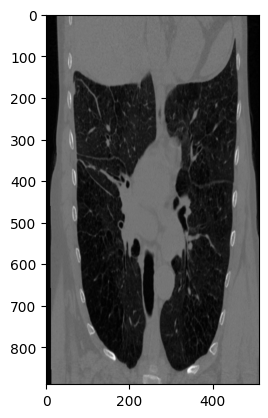

In [12]:
#Shows results from .mhd file Elastix code above

import SimpleITK as sitk
import matplotlib.pyplot as plt

# Load the .mhd file and its associated image data
image_path = 'z:/U-Allyson/Case 24/result.0.mhd'
image = sitk.ReadImage(image_path)

# Get the pixel array
image_array = sitk.GetArrayFromImage(image)

# Choose a specific slice to display, for example, slice 0
slice_to_display = image_array[:, 250, :]

# Display the selected slice using Matplotlib
plt.imshow(slice_to_display, cmap='gray')
plt.show()